**Опис фотографії собак та котів**

Переглянувши кілька випадкових фотографій у каталозі, ви побачите, що вони кольорові та мають різну форму і розмір.

Наприклад, давайте завантажимо і побудуємо перші дев'ять фотографій собак в одну фігуру.

Повний приклад наведено нижче.

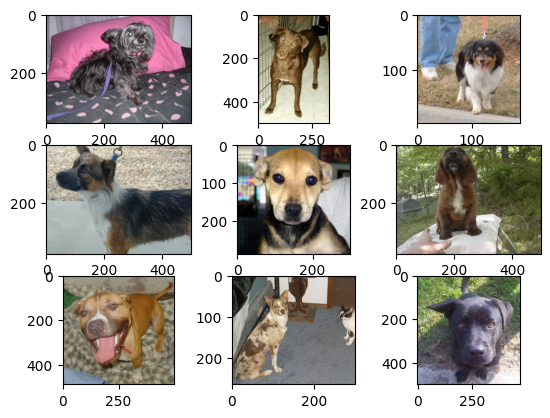

In [1]:
from matplotlib import pyplot
from matplotlib.image import imread
dog_folder = 'data/dataset_dogs_vs_cats/train/Dogs/'
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = dog_folder + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()


Ми можемо оновити приклад і замінити його на сюжетні фотографії котів; повний приклад наведено нижче.

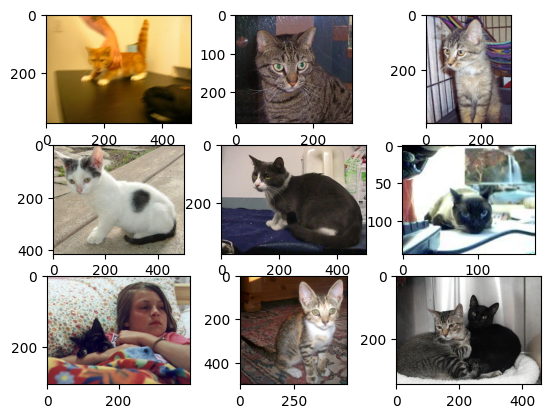

In [2]:
from matplotlib import pyplot
from matplotlib.image import imread
dog_folder = 'data/dataset_dogs_vs_cats/train/Cats/'
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = dog_folder + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.show()

Знову ж таки, ми бачимо, що всі фотографії різного розміру.

Ми також бачимо фото, на якому кота ледь видно (нижній лівий кут), а на іншому - двох котів (нижній правий кут). Це говорить про те, що будь-який класифікатор, який підходить для цієї проблеми, повинен бути надійним.

**Виберіть Стандартний розмір фотографій**

Перед моделюванням фотографії потрібно буде змінити форму, щоб усі зображення мали однакову форму. Часто це невеликі квадратні зображення.

Існує багато способів досягти цього, хоча найпоширенішим є проста операція зміни розміру, яка розтягує і деформує співвідношення сторін кожного зображення і примушує його до нової форми.

Ми можемо завантажити всі фотографії і подивитися на розподіл ширини і висоти фотографій, а потім спроектувати новий розмір фотографії, який найкраще відображає те, що ми, швидше за все, побачимо на практиці.

Менші вхідні дані означають, що модель швидше навчається, і, як правило, саме цей аспект домінує при виборі розміру зображення. У цьому випадку ми будемо дотримуватися цього підходу і виберемо фіксований розмір 200×200 пікселів.

**Попередньо обробка розмірів фотографій (необов'язково)**

Якщо ми хочемо завантажити всі зображення в пам'ять, ми можемо підрахувати, що для цього знадобиться близько 12 гігабайт оперативної пам'яті.

Це 25 000 зображень розміром 200x200x3 пікселів кожне, або 3 000 000 000 32-бітних значень пікселів.

Ми могли б завантажити всі зображення, змінити їх форму і зберегти як єдиний масив NumPy. Це може поміститися в оперативній пам'яті на багатьох сучасних машинах, але не на всіх, особливо якщо у вас є лише 8 гігабайт для роботи.

Ми можемо написати спеціальний код для завантаження зображень у пам'ять і зміни їхнього розміру в процесі завантаження, а потім зберегти їх готовими до моделювання.

У наведеному нижче прикладі використовується API обробки зображень Keras для завантаження всіх 25 000 фотографій з навчального набору даних і перетворення їх у квадратні фотографії розміром 200×200. Для кожної фотографії також визначається мітка на основі імен файлів. Потім зберігається кортеж фотографій і міток.

**Увага!**

Запуск прикладу може зайняти близько однієї хвилини для завантаження всіх зображень у пам'ять і виведення форми завантажених даних для підтвердження того, що вони були завантажені правильно.

Примітка: запуск цього прикладу передбачає, що у вас більше 12 гігабайт оперативної пам'яті. Ви можете пропустити цей приклад, якщо у вас недостатньо оперативної пам'яті; він надається лише для демонстрації.


In [3]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

dog_folder = 'data/dataset_dogs_vs_cats/train/Dogs/'
cat_folder = 'data/dataset_dogs_vs_cats/train/Cats/'
photos, labels = list(), list()
i = 0
for file in listdir(dog_folder):

    output = 0.0
    photo = load_img(dog_folder + file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    if i % 1000  == 0 and i != 0:
        print(f'Loaded {i} images from dogs')
    i += 1

   

print('-'*20)
i = 0
for file in listdir(cat_folder):
    try:
        output = 1.0
        photo = load_img(cat_folder + file, target_size=(200, 200))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)

        if i % 1000  == 0 and i != 0:
            print(f'Loaded {i} images from cats')
        i += 1
    except Exception as e:
        print(f'Error loading image {file}')
        continue 

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

Loaded 1000 images from dogs
Loaded 2000 images from dogs
Loaded 3000 images from dogs
Loaded 4000 images from dogs
Loaded 5000 images from dogs
Loaded 6000 images from dogs
Loaded 7000 images from dogs
Loaded 8000 images from dogs


c:\Users\Valentyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Loaded 9000 images from dogs
Loaded 10000 images from dogs
--------------------
Loaded 1000 images from cats
Loaded 2000 images from cats
Loaded 3000 images from cats
Loaded 4000 images from cats
Loaded 5000 images from cats
Loaded 6000 images from cats
Loaded 7000 images from cats
Loaded 8000 images from cats
Loaded 9000 images from cats
(20001, 200, 200, 3) (20001,)



Підготовлені дані можна завантажувати безпосередньо, наприклад:

In [3]:
# load and confirm the shape
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(20001, 200, 200, 3) (20001,)


**Попередня обробка фотографій у стандартних каталогах**

Крім того, ми можемо завантажувати зображення поступово, використовуючи клас Keras ImageDataGenerator і API flow_from_directory(). Це буде повільніше, але працюватиме на більшій кількості машин.


Цей API віддає перевагу тому, щоб дані були розділені на окремі каталоги train/ і test/, а під кожним каталогом був підкаталог для кожного класу, наприклад, train/dog/ і train/cat/ підкаталоги, і такий самий підкаталог для test. Зображення потім організовуються у підкаталогах.

Ми можемо написати скрипт для створення копії набору даних з такою структурою. Ми випадковим чином виберемо 25% зображень (або 6 250) для використання в тестовому наборі даних.

Спочатку нам потрібно створити структуру каталогів наступним чином:

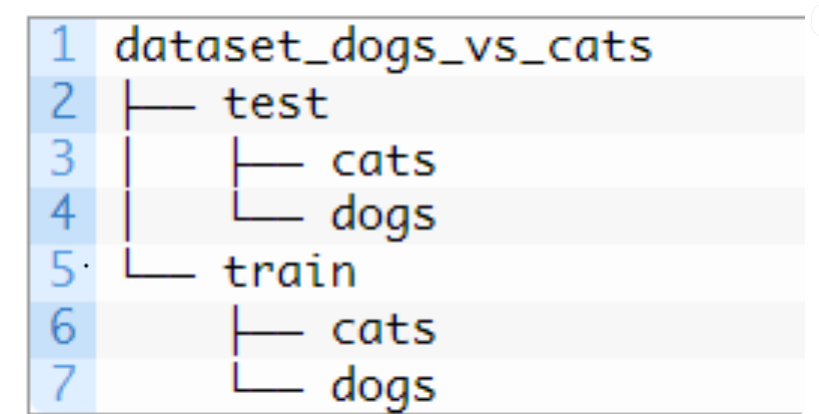

Ми можемо створювати каталоги в Python за допомогою функції makedirs() і використовувати цикл для створення підкаталогів dog/ і cat/ для каталогів train/ і test/.

In [ ]:
# from os import makedirs
# # create directories
# dataset_home = 'dataset_dogs_vs_cats/'
# subdirs = ['train/', 'test/']
# for subdir in subdirs:
#     # create label subdirectories
#     labeldirs = ['dogs/', 'cats/']
#     for labldir in labeldirs:
#         newdir = dataset_home + subdir + labldir
#         makedirs(newdir, exist_ok=True)

Далі ми можемо перерахувати всі файли зображень у наборі даних і скопіювати їх до підкаталогу dogs/ або cats/ на основі їхніх імен.

Крім того, ми можемо випадковим чином вирішити залишити 25% зображень у тестовому наборі даних. Це робиться послідовно, фіксуючи початкове значення для генератора псевдовипадкових чисел, щоб ми отримували однаковий розподіл даних при кожному запуску коду.

In [7]:
# from random import seed,random
# from shutil import copyfile
# # seed random number generator
# seed(1)
# # define ratio of pictures to use for validation
# val_ratio = 0.25
# # copy training dataset images into subdirectories
# src_directory = 'train/'
# for file in listdir(src_directory):
#     src = src_directory + '/' + file
#     dst_dir = 'train/'
#     if random() < val_ratio:
#         dst_dir = 'test/'
#     if file.startswith('cat'):
#         dst = dataset_home + dst_dir + 'cats/'  + file
#         copyfile(src, dst)
#     elif file.startswith('dog'):
#         dst = dataset_home + dst_dir + 'dogs/'  + file
#         copyfile(src, dst)

**Розробка CNN**


Кожен шар використовуватиме функцію активації ReLU та ініціалізацію вагових коефіцієнтів He, які, як правило, є найкращими практиками. Наприклад, 3-блочна архітектура у стилі VGG, де кожен блок має один шар згортки та об'єднання, може бути визначена у Keras наступним чином:

In [3]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [4]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()


In [5]:
from PIL import Image
import os

def remove_corrupt_images(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Перевіряє, чи зображення читається
            except Exception as e:
                print(f"Видалення пошкодженого файлу: {file_path} ({e})")
                os.remove(file_path)

# Виклик перед запуском моделі:
remove_corrupt_images('data/dataset_dogs_vs_cats/train/')
remove_corrupt_images('data/dataset_dogs_vs_cats/test/')

c:\Users\Valentyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # prepare iterators
    train_it = datagen.flow_from_directory(
        'data/dataset_dogs_vs_cats/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )
    test_it = datagen.flow_from_directory(
        'data/dataset_dogs_vs_cats/test/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )

    # fit model using .fit() instead of deprecated .fit_generator()
    history = model.fit(
        train_it,
        steps_per_epoch=len(train_it),
        validation_data=test_it,
        validation_steps=len(test_it),
        epochs=20,
        verbose=0
    )

    # evaluate model using .evaluate() instead of .evaluate_generator()
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()


c:\Users\Valentyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20001 images belonging to 2 classes.
Found 4997 images belonging to 2 classes.


c:\Users\Valentyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Valentyn\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


> 72.383


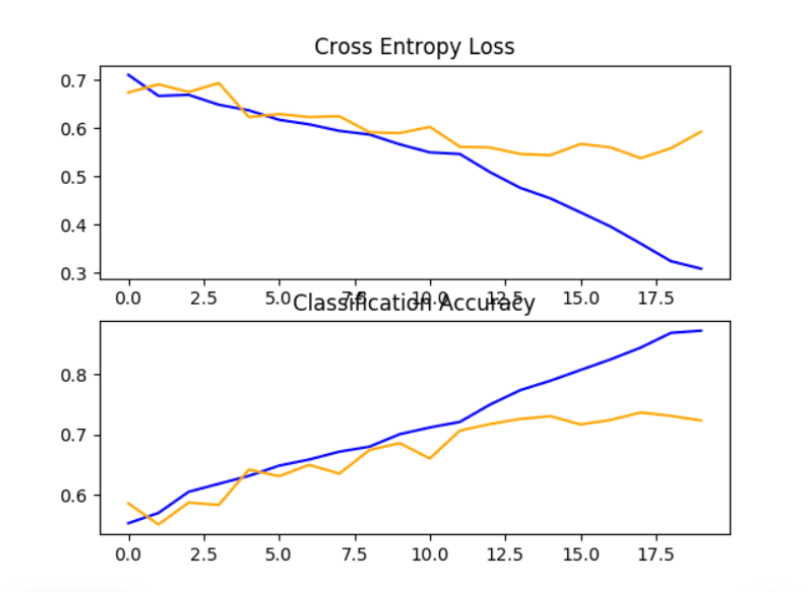

У цьому випадку ми бачимо, що модель досягла точності близько 72% на тестовому наборі даних.

Також створено рисунок, на якому показано лінійний графік для втрат і ще один для точності моделі на тренувальному (синій) і тестовому (помаранчевий) наборах даних.

Розглядаючи цей графік, ми бачимо, що модель перевищила навчальний набір даних приблизно на 12 епох.

**Триблокова модель VGG**

Триблокова модель VGG розширює двоблокову модель і додає третій блок з 128 фільтрами.

Функція define_model() для цієї моделі була описана в попередньому розділі, але для повноти викладу ми наведемо її нижче.

In [9]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model